# Credit goes to : 
https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day55-regularized-linear-models/Ridge%20Regularization.ipynb

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
X=data.data
y=data.target

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

### Predict using LinearRegression simple model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [29]:
y_pred = lr.predict(X_test)
print ("r2 score : ", r2_score(y_pred, y_test))
print ("RMSE score : ", np.sqrt(mean_squared_error(y_pred, y_test)))


r2 score :  0.1599284464431482
RMSE score :  48.727137609532534


### Predict using LinearRegression using ridge R2

In [34]:
from sklearn.linear_model import Ridge

In [59]:
alpha = 0.0025

In [60]:
r = Ridge(alpha=alpha)
r.fit(X_train, y_train)
print(r.coef_)
print(r.intercept_)

[  24.64705692 -245.11165726  495.03715077  328.68189352 -723.10828868
  376.25053782   76.32351507  228.73403849  699.10778321   91.15545609]
152.11196828333658


In [62]:
y_pred1 = r.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5213495757943106
RMSE 48.5984502073882


In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with a regularization strength alpha
ridge_reg = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Optionally, you can inspect the coefficients
coefficients = ridge_reg.coef_
print(f"Coefficients: {coefficients}")


Mean Squared Error: 3077.41593882723
R² Score: 0.41915292635986545
Coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]


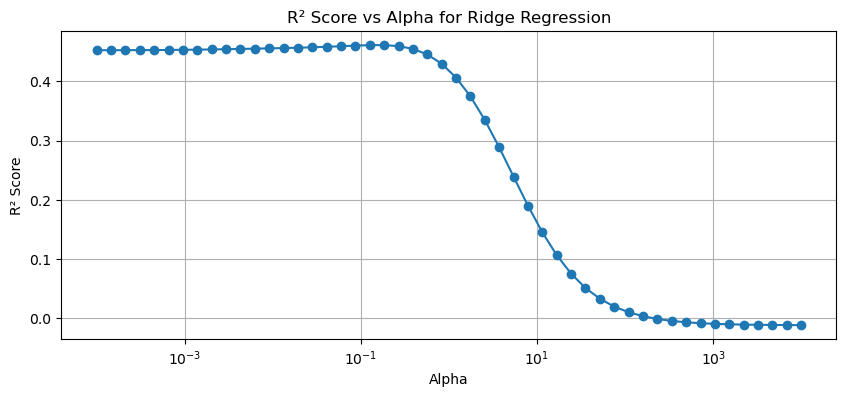

Best R² Score: 0.46132127442636917 at Alpha: 0.18420699693267145


In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values
alpha_values = np.logspace(-4, 4, 50)

# Initialize a list to store R² scores
r2_scores = []

# Loop through the alpha values
for alpha in alpha_values:
    # Initialize the Ridge regression model with the current alpha
    ridge_reg = Ridge(alpha=alpha)
    
    # Fit the model on the training data
    ridge_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = ridge_reg.predict(X_test)
    
    # Compute the R² score
    r2 = r2_score(y_test, y_pred)
    
    # Store the R² score
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(alpha_values, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha for Ridge Regression')
plt.grid(True)
plt.show()

# Print the best R² score and the corresponding alpha value
best_r2 = max(r2_scores)
best_alpha = alpha_values[r2_scores.index(best_r2)]
print(f"Best R² Score: {best_r2} at Alpha: {best_alpha}")


In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values
alpha_values = np.logspace(-4, 4, 50)

# Initialize lists to store R² and Adjusted R² scores for Ridge and Lasso
ridge_r2_scores = []
ridge_adj_r2_scores = []
lasso_r2_scores = []
lasso_adj_r2_scores = []

# Number of observations and predictors
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

# Loop through the alpha values for Ridge
for alpha in alpha_values:
    # Ridge regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_scaled)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    adj_r2_ridge = 1 - ((1 - r2_ridge) * (n - 1) / (n - p - 1))
    ridge_r2_scores.append(r2_ridge)
    ridge_adj_r2_scores.append(adj_r2_ridge)

# Loop through the alpha values for Lasso
for alpha in alpha_values:
    # Lasso regression
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_scaled)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    adj_r2_lasso = 1 - ((1 - r2_lasso) * (n - 1) / (n - p - 1))
    lasso_r2_scores.append(r2_lasso)
    lasso_adj_r2_scores.append(adj_r2_lasso)



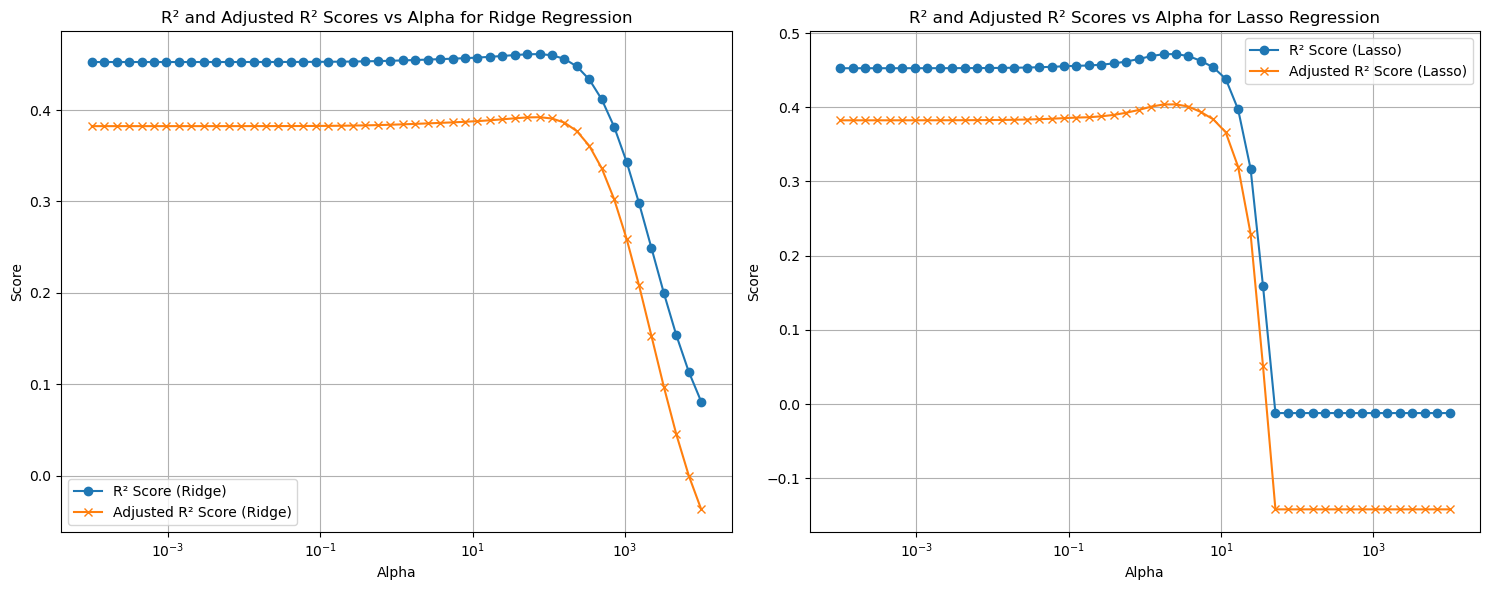

Best R² Score (Ridge): 0.4612719454659274 at Alpha: 75.43120063354607
Best Adjusted R² Score (Ridge): 0.39220424616668736 at Alpha: 75.43120063354607
Best R² Score (Lasso): 0.4716401515477344 at Alpha: 2.559547922699533
Best Adjusted R² Score (Lasso): 0.4039017094384696 at Alpha: 2.559547922699533


In [86]:
# Plot the results in a single row with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot R² and Adjusted R² for Ridge
axs[0].plot(alpha_values, ridge_r2_scores, marker='o', label='R² Score (Ridge)')
axs[0].plot(alpha_values, ridge_adj_r2_scores, marker='x', label='Adjusted R² Score (Ridge)')
axs[0].set_xscale('log')
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('Score')
axs[0].set_title('R² and Adjusted R² Scores vs Alpha for Ridge Regression')
axs[0].legend()
axs[0].grid(True)

# Plot R² and Adjusted R² for Lasso
axs[1].plot(alpha_values, lasso_r2_scores, marker='o', label='R² Score (Lasso)')
axs[1].plot(alpha_values, lasso_adj_r2_scores, marker='x', label='Adjusted R² Score (Lasso)')
axs[1].set_xscale('log')
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Score')
axs[1].set_title('R² and Adjusted R² Scores vs Alpha for Lasso Regression')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Print the best R² and Adjusted R² scores with their corresponding alpha values for Ridge
best_r2_ridge = max(ridge_r2_scores)
best_alpha_r2_ridge = alpha_values[ridge_r2_scores.index(best_r2_ridge)]
print(f"Best R² Score (Ridge): {best_r2_ridge} at Alpha: {best_alpha_r2_ridge}")

best_adj_r2_ridge = max(ridge_adj_r2_scores)
best_alpha_adj_r2_ridge = alpha_values[ridge_adj_r2_scores.index(best_adj_r2_ridge)]
print(f"Best Adjusted R² Score (Ridge): {best_adj_r2_ridge} at Alpha: {best_alpha_adj_r2_ridge}")

# Print the best R² and Adjusted R² scores with their corresponding alpha values for Lasso
best_r2_lasso = max(lasso_r2_scores)
best_alpha_r2_lasso = alpha_values[lasso_r2_scores.index(best_r2_lasso)]
print(f"Best R² Score (Lasso): {best_r2_lasso} at Alpha: {best_alpha_r2_lasso}")

best_adj_r2_lasso = max(lasso_adj_r2_scores)
best_alpha_adj_r2_lasso = alpha_values[lasso_adj_r2_scores.index(best_adj_r2_lasso)]
print(f"Best Adjusted R² Score (Lasso): {best_adj_r2_lasso} at Alpha: {best_alpha_adj_r2_lasso}")
